# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from sklearn.cluster import KMeans

# Load data

In [2]:
df = pd.read_csv('weatherAUS.csv')

# Exploratory Data Analysis

In [3]:
# show the first 5 rows
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
# data shape
df.shape

(145460, 23)

In [5]:
# data types
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [6]:
# data columns
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [8]:
"""

dataset contains numerical (float64) and categorical variables(object) each needs different analysis

"""

'\n\ndataset contains numerical (float64) and categorical variables(object) each needs different analysis\n\n'

In [9]:
# numerical variables description
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [10]:
# categorical variables description
df.describe(include='object')

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


# Target variable

In [11]:
# explore the target variable
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [12]:
# percentage of each class
df['RainTomorrow'].value_counts(normalize=True)

No     0.775819
Yes    0.224181
Name: RainTomorrow, dtype: float64

<Axes: xlabel='RainTomorrow', ylabel='count'>

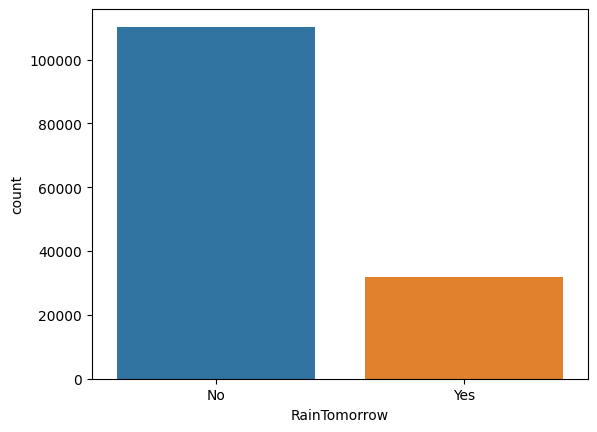

In [13]:
# plot the target variable as a bar plot
sns.countplot(x='RainTomorrow', data=df)

In [14]:
"""
Target variable is categorical with two classes, 'Yes' and 'No'.
As we can see from the above results, the dataset is imbalanced as the number of 'No' is much higher than the number of 'Yes'
"""

"\nTarget variable is categorical with two classes, 'Yes' and 'No'.\nAs we can see from the above results, the dataset is imbalanced as the number of 'No' is much higher than the number of 'Yes'\n"

In [15]:
# missing values in the target variable
df['RainTomorrow'].isnull().sum()

3267

In [16]:
# unique values in the target variable
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [17]:
"""
we can see that the target variable has small number of missing values which we will 
probably drop later and it has two unique values 'Yes' and 'No'.
"""

"\nwe can see that the target variable has small number of missing values which we will \nprobably drop later and it has two unique values 'Yes' and 'No'.\n"

# Numerical variables

In [18]:
# explore the numerical columns
numerical = df.select_dtypes(include=['float64']).columns
numerical

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [19]:
# show the first 5 rows of the numerical columns
df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


In [20]:
# missing values in the numerical columns
df[numerical].isnull().sum().sort_values(ascending=False)

Sunshine         69835
Evaporation      62790
Cloud3pm         59358
Cloud9am         55888
Pressure9am      15065
Pressure3pm      15028
WindGustSpeed    10263
Humidity3pm       4507
Temp3pm           3609
Rainfall          3261
WindSpeed3pm      3062
Humidity9am       2654
WindSpeed9am      1767
Temp9am           1767
MinTemp           1485
MaxTemp           1261
dtype: int64

In [21]:
# percentage of missing values in the numerical columns
df[numerical].isnull().mean().sort_values(ascending=False)

Sunshine         0.480098
Evaporation      0.431665
Cloud3pm         0.408071
Cloud9am         0.384216
Pressure9am      0.103568
Pressure3pm      0.103314
WindGustSpeed    0.070555
Humidity3pm      0.030984
Temp3pm          0.024811
Rainfall         0.022419
WindSpeed3pm     0.021050
Humidity9am      0.018246
WindSpeed9am     0.012148
Temp9am          0.012148
MinTemp          0.010209
MaxTemp          0.008669
dtype: float64

In [22]:
"""
The nummerical variables have a lot of missing values, some of them like
sunshine has almost half of its values missing.
"""

'\nThe nummerical variables have a lot of missing values, some of them like\nsunshine has almost half of its values missing.\n'

In [23]:
# statistical summary of the numerical columns
df[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


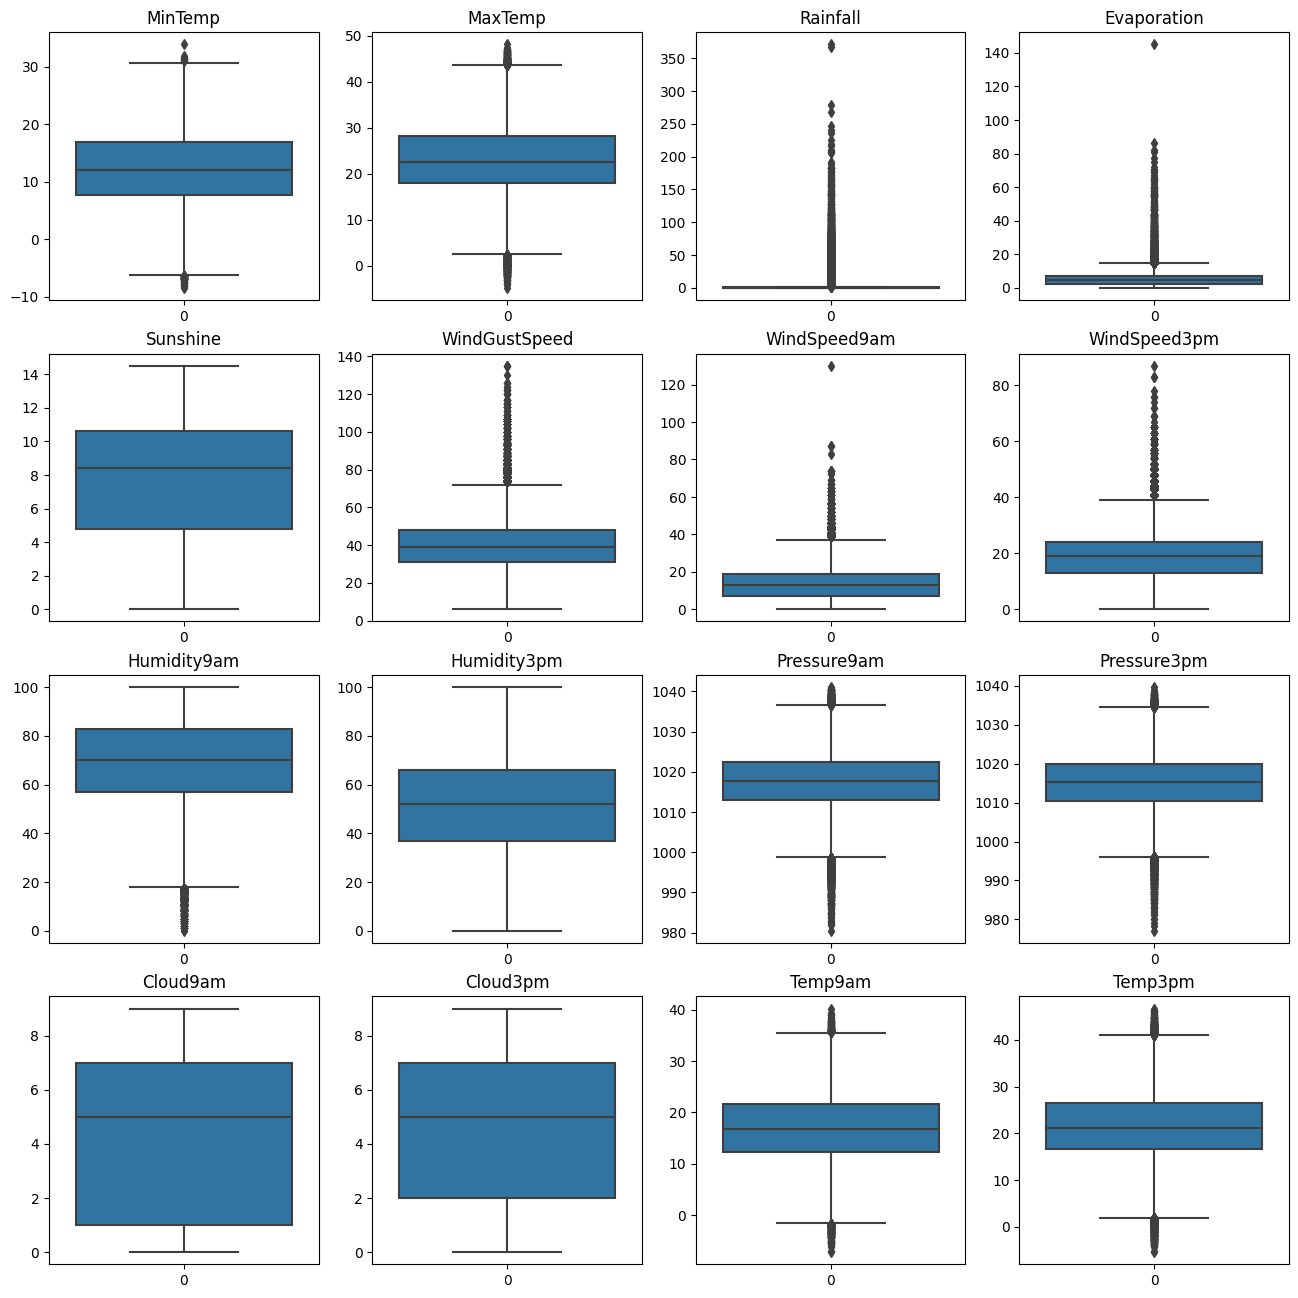

In [24]:
# outliers for all numerical columns
plt.figure(figsize=(16, 16))
for i, col in enumerate(numerical):
    plt.subplot(4, 4, i+1)
    sns.boxplot(df[col])
    plt.title(col)
plt.show()

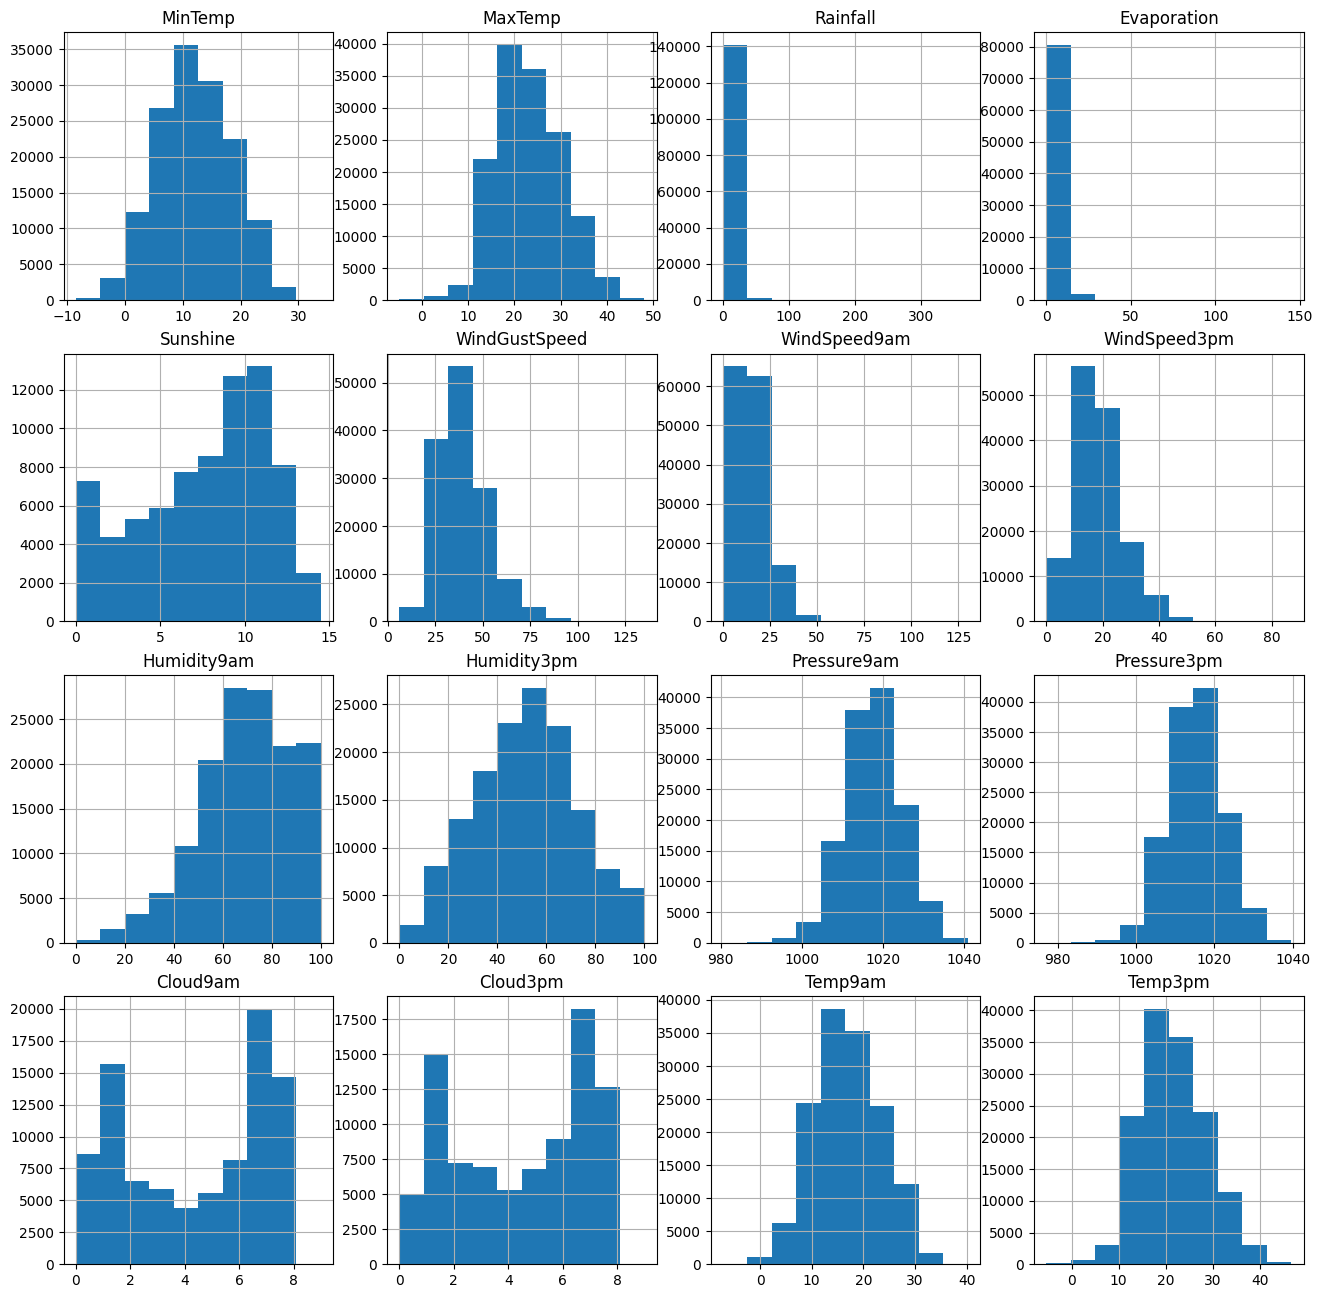

In [25]:
# histogram for all the numerical columns
plt.figure(figsize=(16,16))
for i, col in enumerate(numerical):
    plt.subplot(4, 4, i+1)
    df[col].hist()
    plt.title(col)

In [26]:
# outliers percentage for all numerical columns as df
outliers_percentage = pd.DataFrame(columns=['Outliers %'])
for col in numerical:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    outliers_percentage.loc[col] = len(df[(df[col] < (q1 - 1.5 * iqr)) | (df[col] > (q3 + 1.5 * iqr))]) / len(df) * 100
outliers_percentage.sort_values('Outliers %', ascending=False)

,Outliers %
Rainfall,17.584216
WindGustSpeed,2.125670
WindSpeed3pm,1.734497
Evaporation,1.371511
WindSpeed9am,1.249141
Humidity9am,0.979651
Pressure9am,0.818782
Pressure3pm,0.631789
Temp3pm,0.525230
MaxTemp,0.336175


In [27]:
"""
From the above boxplots and histograms we can see that Some numerical variables have outliers, 
specially Rainfall, WindGustSpeed, WindSpeed3pm, Evaporation, WindSpeed9am which have alot of outliers.

We can use the IQR method to get estimates of the outliers percentage in each numerical column.
"""

'\nFrom the above boxplots and histograms we can see that Some numerical variables have outliers, \nspecially Rainfall, WindGustSpeed, WindSpeed3pm, Evaporation, WindSpeed9am which have alot of outliers.\n\nWe can use the IQR method to get estimates of the outliers percentage in each numerical column.\n'

# categorical variables

In [28]:
# get the categorical columns
categorical = df.select_dtypes(include=['object']).columns
categorical

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [29]:
# show the first 5 rows of the categorical columns
df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [30]:
# missing values in the categorical columns
df[categorical].isnull().sum().sort_values(ascending=False)

WindDir9am      10566
WindGustDir     10326
WindDir3pm       4228
RainTomorrow     3267
RainToday        3261
Date                0
Location            0
dtype: int64

In [31]:
# percentage of missing values in the categorical columns
df[categorical].isnull().mean().sort_values(ascending=False)

WindDir9am      0.072639
WindGustDir     0.070989
WindDir3pm      0.029066
RainTomorrow    0.022460
RainToday       0.022419
Date            0.000000
Location        0.000000
dtype: float64

In [32]:
"""
The categorical variables have missing values too, however, 
the missing values are way less than the numerical variables.

Where the variable with the max missing values has less than 1% missing values.
"""

'\nThe categorical variables have missing values too, however, \nthe missing values are way less than the numerical variables.\n\nWhere the variable with the max missing values has less than 1% missing values.\n'

In [33]:
df[categorical].describe(include='object')

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


In [34]:
# number of unique values in each categorical column
df[categorical].nunique().sort_values(ascending=False)

Date            3436
Location          49
WindGustDir       16
WindDir9am        16
WindDir3pm        16
RainToday          2
RainTomorrow       2
dtype: int64

In [35]:
# explore unique values in each categorical column
for col in categorical:
    print(f'Unique values in {col} are: \n{df[col].unique()}')
    print()

Unique values in Date are: 
['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31']

Unique values in Location are: 
['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']

Unique values in WindGustDir are: 
['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']

Unique values in WindDir9am are: 
['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']

Unique values in Wi

In [36]:
# explore values counts in each categorical column
for col in categorical:
    print(f'Value counts in {col} are: \n{df[col].value_counts()}')
    print()

Value counts in Date are: 
2013-11-12    49
2014-09-01    49
2014-08-23    49
2014-08-24    49
2014-08-25    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: Date, Length: 3436, dtype: int64

Value counts in Location are: 
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale           

In [37]:
"""
We can notice that the date column has 3436 unique values and that is alot compared to
other columns one way deal with that is to divide date into day, month and year columns.

1-hot encoding can be a good way to deal with categorical variables.
"""

'\nWe can notice that the date column has 3436 unique values and that is alot compared to\nother columns one way deal with that is to divide date into day, month and year columns.\n\n1-hot encoding can be a good way to deal with categorical variables.\n'

# Relationships between variables

C:\Users\batyo\AppData\Local\Temp\ipykernel_17116\3493430379.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(),square=True, annot=True, cmap='coolwarm', linewidths=0.2, linecolor='white', fmt='.2f')


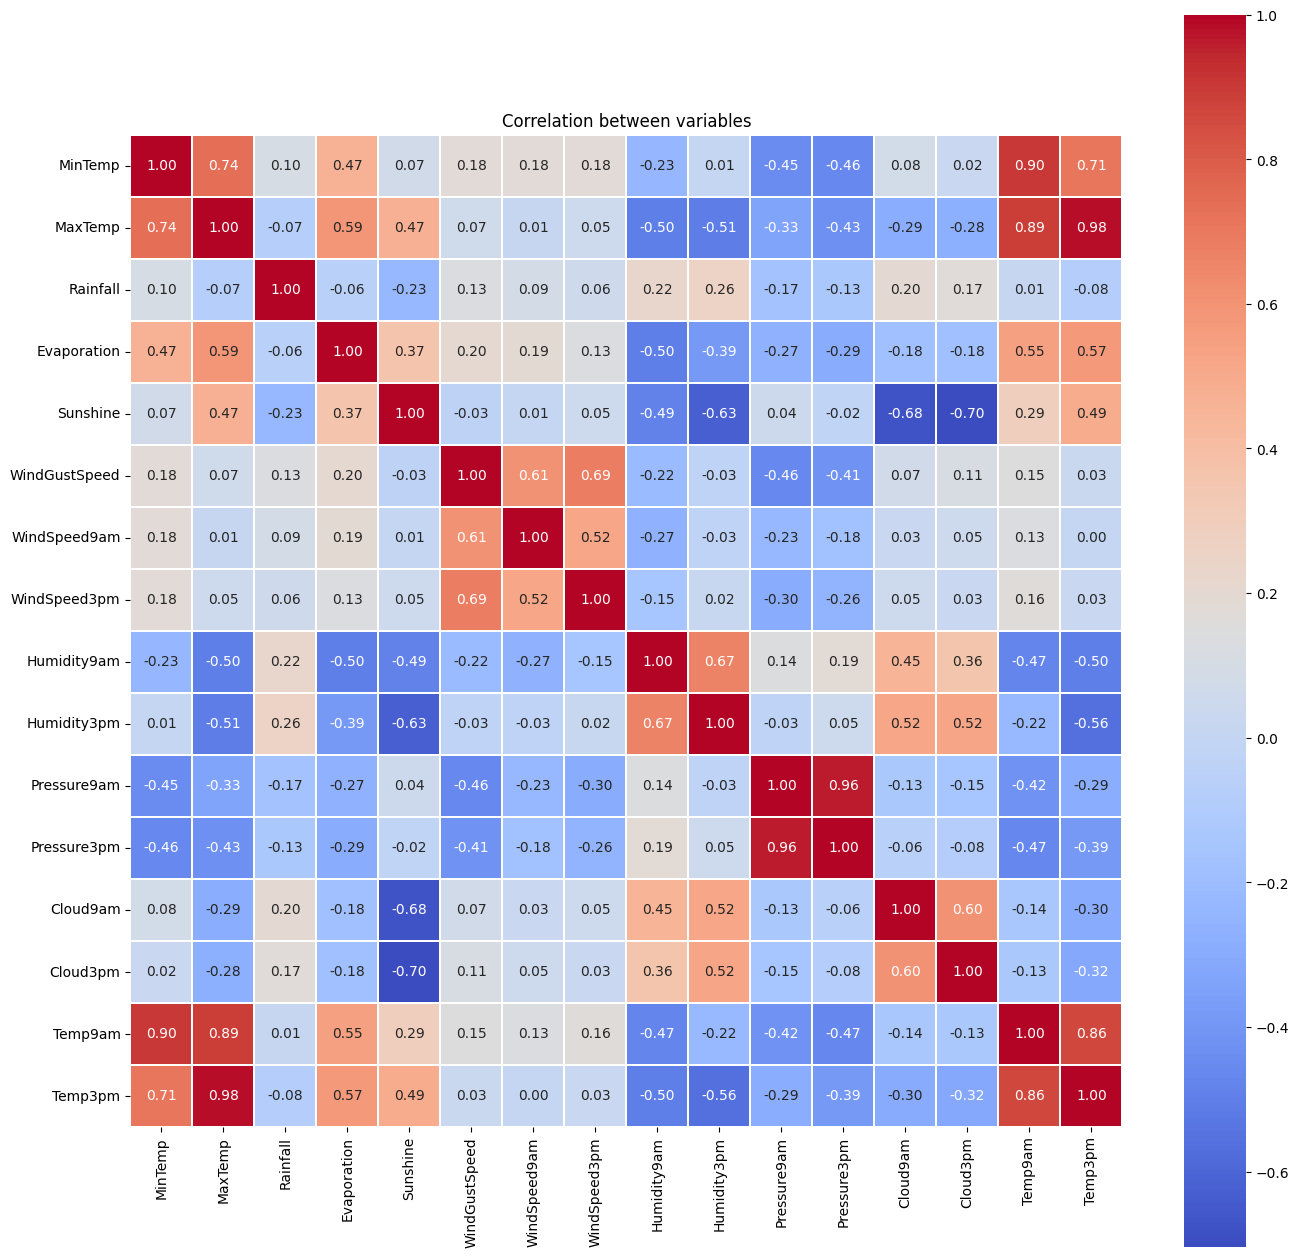

In [38]:
# heatmap for the correlation between variables
plt.figure(figsize=(16, 16))
plt.title('Correlation between variables')
ax = sns.heatmap(df.corr(),square=True, annot=True, cmap='coolwarm', linewidths=0.2, linecolor='white', fmt='.2f')

In [39]:
"""
From the above heatmap we can see that:

there is a high positive correlation between 
    - min temperature, max temperature , temperature at 3pm, temperature at 9am.
    - wind gust speed, wind speed at 3pm, wind speed at 9am.
    - humidity at 3pm, humidity at 9am.
    - pressure at 3pm, pressure at 9am.
    - cloud 3pm, cloud 9am.

there is a high negative correlation between
    - sunshine and cloud (intuitively makes sense).
    - sunshine and humidity at 3pm.

"""

'\nFrom the above heatmap we can see that:\n\nthere is a high positive correlation between \n    - min temperature, max temperature , temperature at 3pm, temperature at 9am.\n    - wind gust speed, wind speed at 3pm, wind speed at 9am.\n    - humidity at 3pm, humidity at 9am.\n    - pressure at 3pm, pressure at 9am.\n    - cloud 3pm, cloud 9am.\n\nthere is a high negative correlation between\n    - sunshine and cloud (intuitively makes sense).\n    - sunshine and humidity at 3pm.\n\n'

(22.5, -0.5)

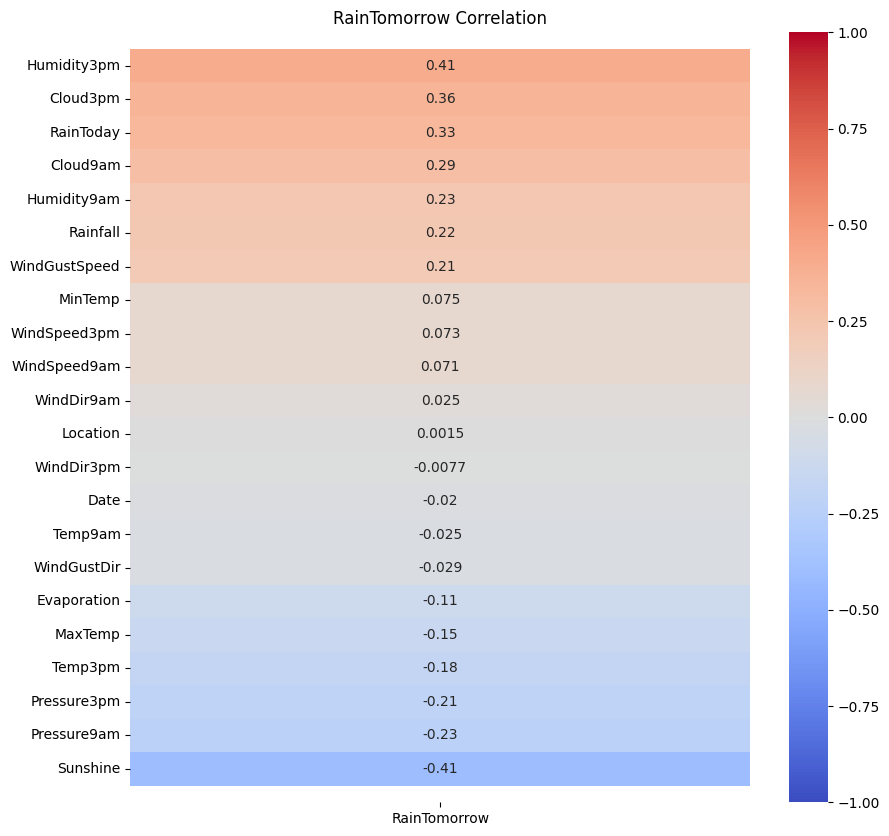

In [40]:
# seaborn correlation matrix
# convert categorical columns to codes using pandas factorize
df2 = df.copy()
df2[categorical] = df2[categorical].apply(lambda x: pd.factorize(x)[0])

corr = df2.corr()
plt.figure(figsize=(10, 10))
RainTomorrow_corr = corr[['RainTomorrow']].sort_values(by=['RainTomorrow'], ascending=False).drop('RainTomorrow')

# make heatmap dark green to red
ax = sns.heatmap(RainTomorrow_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
ax.set_title('RainTomorrow Correlation')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [41]:
"""
The target variable has the highest positive correlation with humidity at 3pm = 0.41
and a highest negative correlation with sunshine = -0.41

Altough the correlation with the target variable is not that high, a machine learning model
has the potential to be able to learn a pattern by combining the variables and predict the target variable.

"""

'\nThe target variable has the highest positive correlation with humidity at 3pm = 0.41\nand a highest negative correlation with sunshine = -0.41\n\nAltough the correlation with the target variable is not that high, a machine learning model\nhas the potential to be able to learn a pattern by combining the variables and predict the target variable.\n\n'

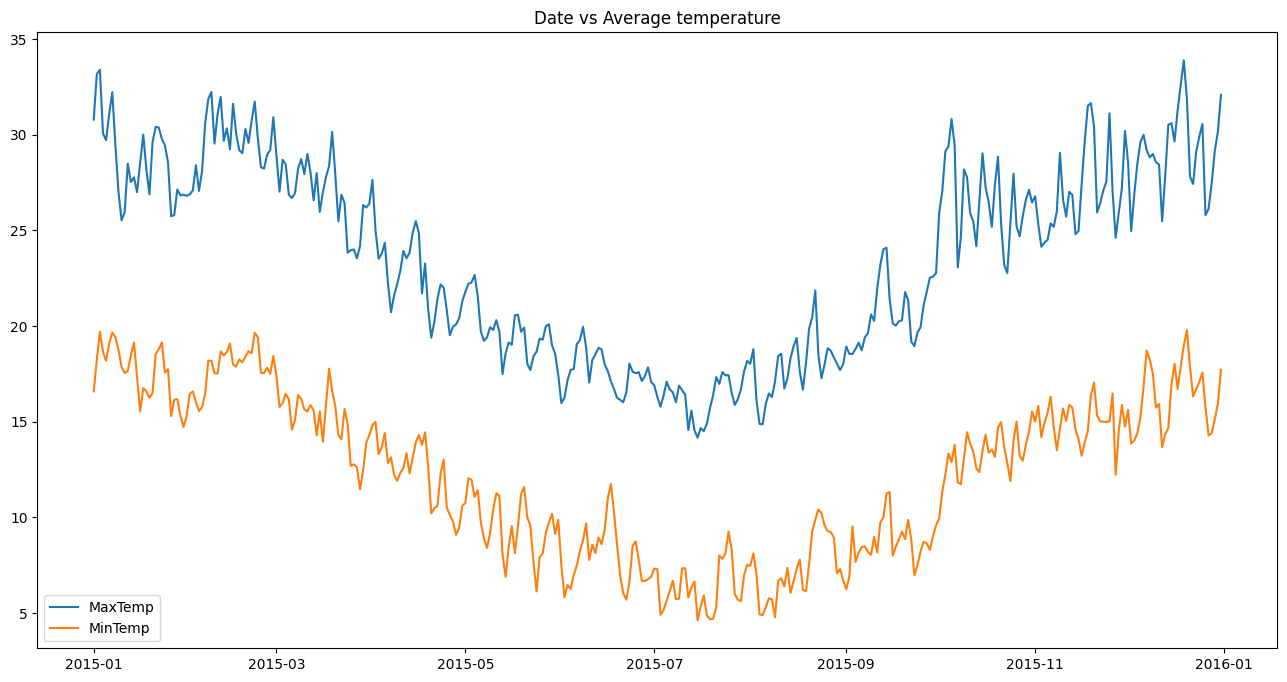

In [42]:
# plot date vs maxtemp

# sort by date
df2 = df.copy()
df2['Date'] = pd.to_datetime(df2['Date'])
df2 = df2.sort_values(by='Date')

# choose only 2015
df2 = df2[df2['Date'].dt.year == 2015]

# group by date and calculate average temperature
df2 = df2.groupby('Date').mean(['MaxTemp', 'MinTemp']).reset_index()

# plot
plt.figure(figsize=(16, 8))
plt.plot(df2['Date'], df2['MaxTemp'])
plt.plot(df2['Date'], df2['MinTemp'])
plt.legend(['MaxTemp', 'MinTemp'])
plt.title('Date vs Average temperature')
plt.show()


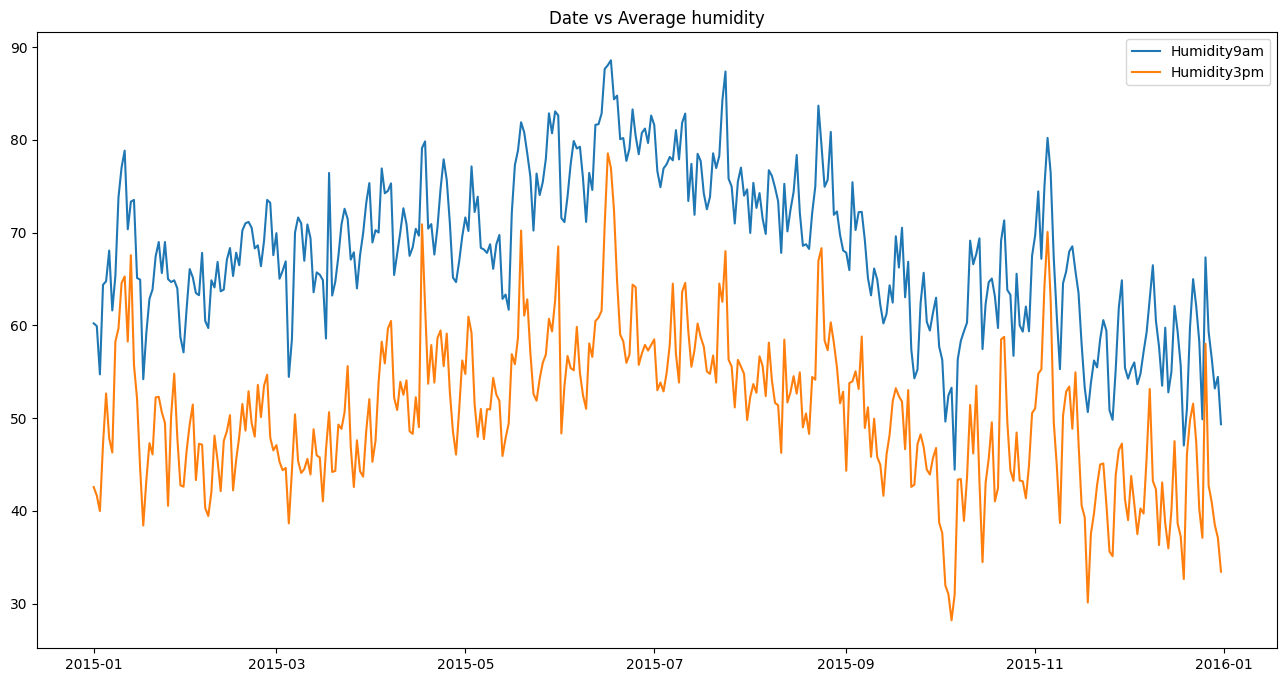

In [43]:
# date vs humidity

# sort by date
df2 = df.copy()
df2['Date'] = pd.to_datetime(df2['Date'])
df2 = df2.sort_values(by='Date')

# choose only 2015
df2 = df2[df2['Date'].dt.year == 2015]

# group by date and calculate average humidity
df2 = df2.groupby('Date').mean(['Humidity9am', 'Humidity3pm']).reset_index()

# plot
plt.figure(figsize=(16, 8))
plt.plot(df2['Date'], df2['Humidity9am'])
plt.plot(df2['Date'], df2['Humidity3pm'])
plt.legend(['Humidity9am', 'Humidity3pm'])
plt.title('Date vs Average humidity')
plt.show()

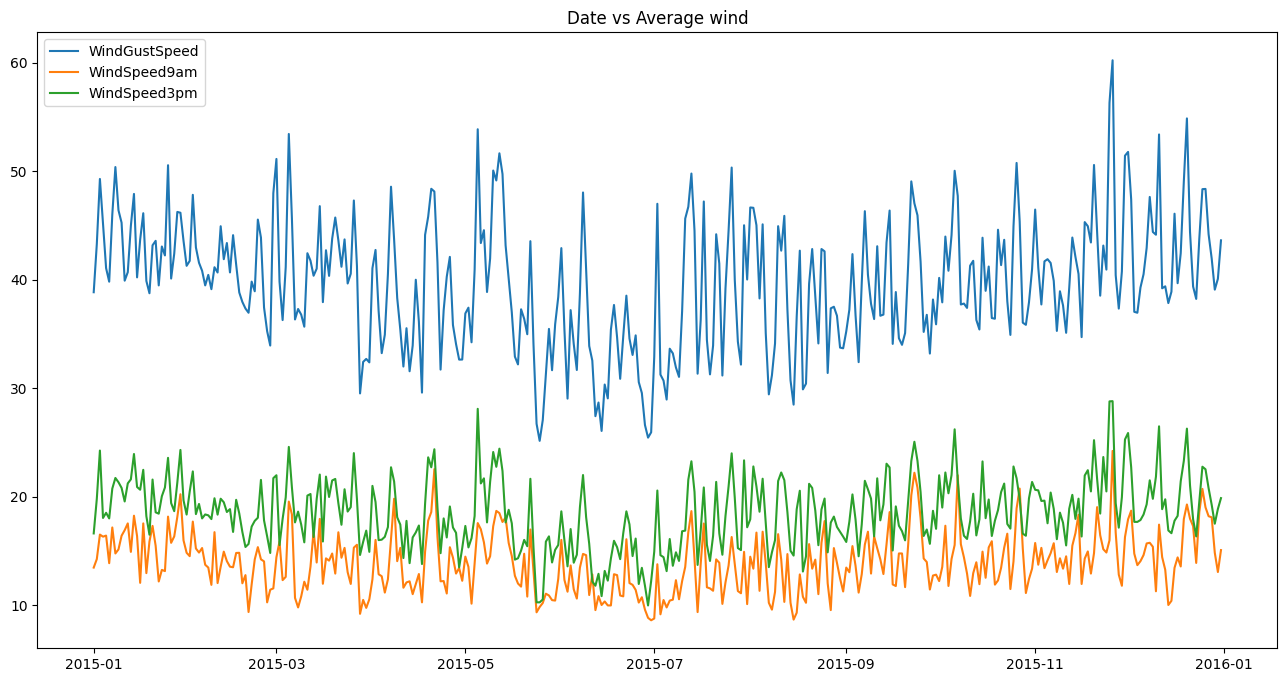

In [44]:
# date vs wind

# sort by date
df2 = df.copy()
df2['Date'] = pd.to_datetime(df2['Date'])
df2 = df2.sort_values(by='Date')

# choose only 2015
df2 = df2[df2['Date'].dt.year == 2015]

# choose only average of windspeed
df2 = df2.groupby('Date').mean(['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']).reset_index()

# plot
plt.figure(figsize=(16, 8))
plt.plot(df2['Date'], df2['WindGustSpeed'])
plt.plot(df2['Date'], df2['WindSpeed9am'])
plt.plot(df2['Date'], df2['WindSpeed3pm'])
plt.legend(['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm'])
plt.title('Date vs Average wind')
plt.show()
# meaning of wind gust speed: https://www.weather.gov/safety/wind-chill-frostbite

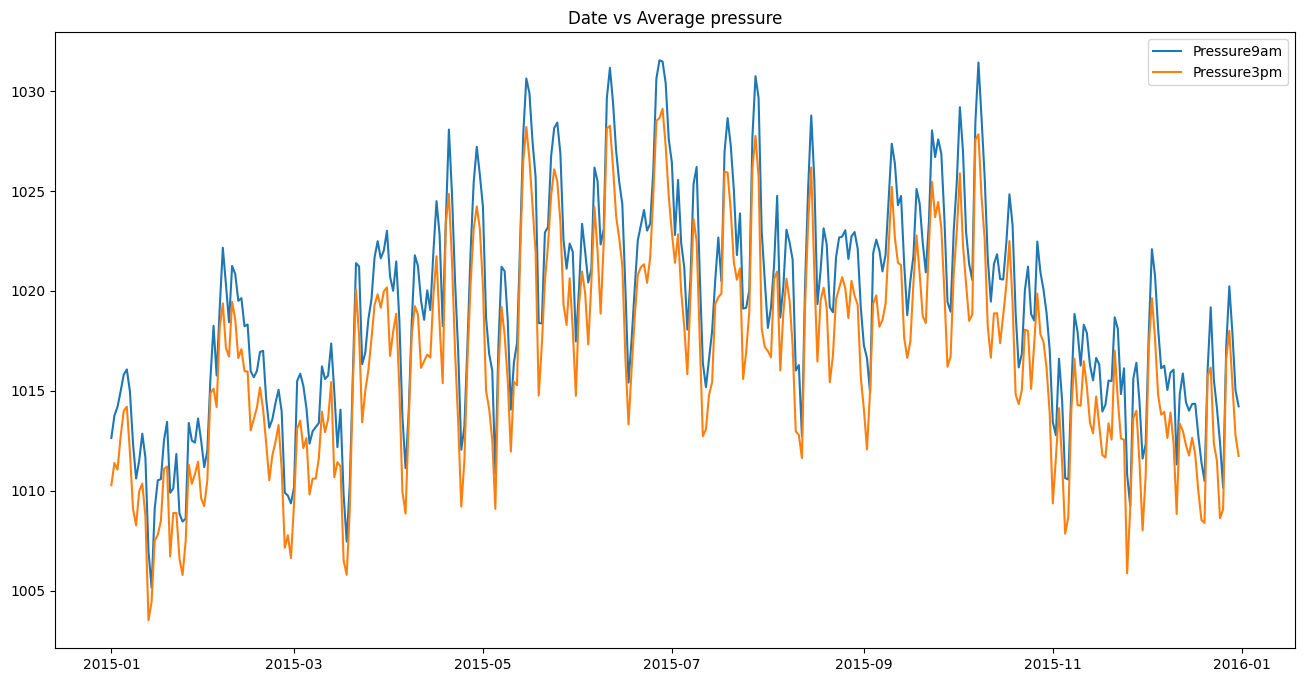

In [45]:
# date vs pressure

# sort by date
df2 = df.copy()
df2['Date'] = pd.to_datetime(df2['Date'])
df2 = df2.sort_values(by='Date')

# choose only 2015
df2 = df2[df2['Date'].dt.year == 2015]

# choose only average of pressure
df2 = df2.groupby('Date').mean(['Pressure9am', 'Pressure3pm']).reset_index()

# plot
plt.figure(figsize=(16, 8))
plt.plot(df2['Date'], df2['Pressure9am'])
plt.plot(df2['Date'], df2['Pressure3pm'])
plt.legend(['Pressure9am', 'Pressure3pm'])
plt.title('Date vs Average pressure')
plt.show()

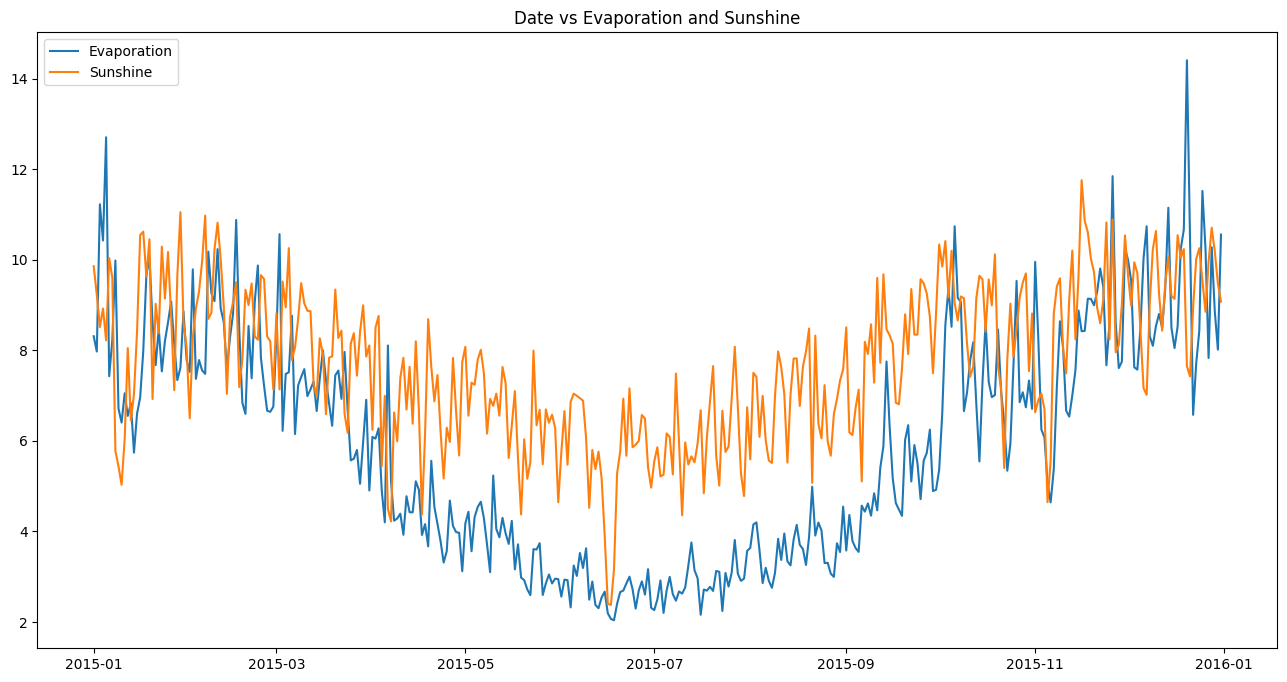

In [46]:
# date vs evaporation and sunshine

# sort by date
df2 = df.copy()
df2['Date'] = pd.to_datetime(df2['Date'])
df2 = df2.sort_values(by='Date')

# choose only 2015
df2 = df2[df2['Date'].dt.year == 2015]

# choose only average of evaporation and sunshine
df2 = df2.groupby('Date').mean(['Evaporation', 'Sunshine']).reset_index()

# plot
plt.figure(figsize=(16, 8))
plt.plot(df2['Date'], df2['Evaporation'])
plt.plot(df2['Date'], df2['Sunshine'])
plt.legend([ 'Evaporation', 'Sunshine'])
plt.title('Date vs Evaporation and Sunshine')
plt.show()

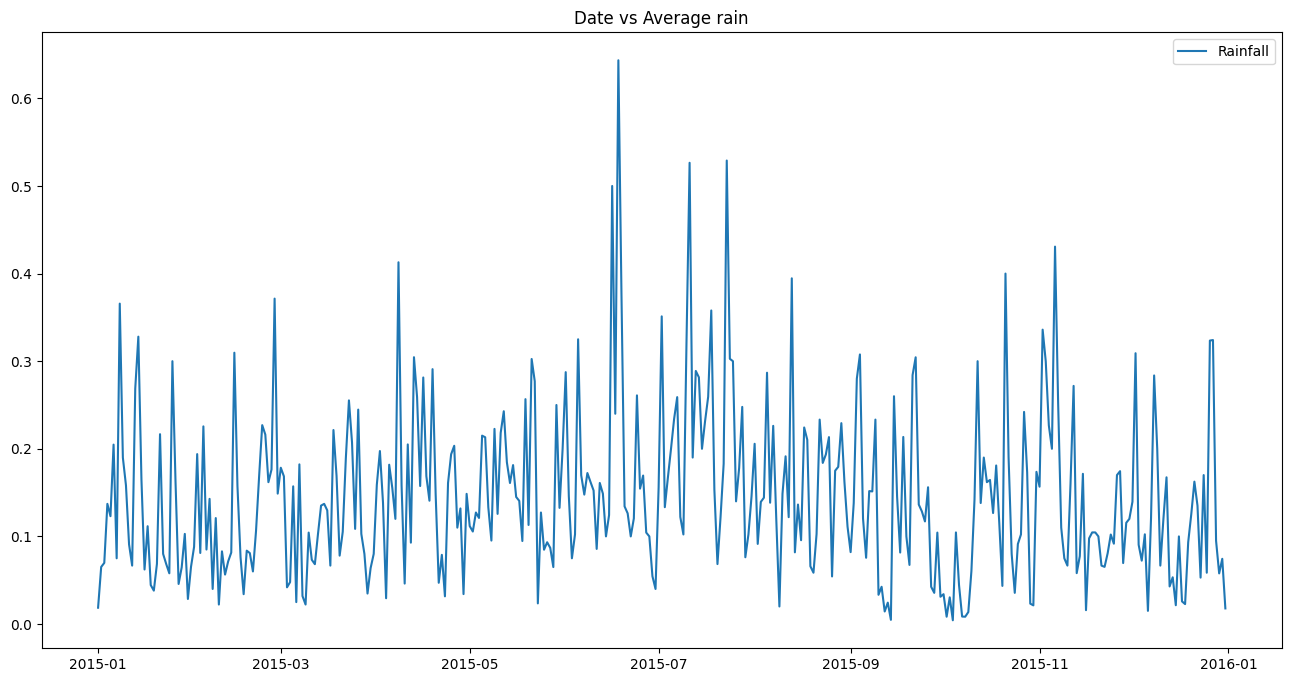

In [47]:
# Date vs RainTomorrow

# sort by date
df2 = df.copy()
df2['Date'] = pd.to_datetime(df2['Date'])
df2 = df2.sort_values(by='Date')

# Remove outliers from Rainfall
colname = 'Rainfall'
IQR = df2[colname].quantile(0.75) - df2[colname].quantile(0.25)
df2 = df2[(df2[colname] < df2[colname].quantile(0.75) + 1.5 * IQR) & (df2[colname] > df2[colname].quantile(0.25) - 1.5 * IQR)]

# choose only 2015
df2 = df2[df2['Date'].dt.year == 2015]

# choose only average of rainfalls
df2 = df2.groupby('Date').mean([colname]).reset_index()

# plot
plt.figure(figsize=(16, 8))
plt.plot(df2['Date'], df2[colname])
plt.legend([colname])
plt.title('Date vs Average rain')
plt.show()

In [48]:
"""
The previous plots show how some of the important variables change over time, 
We took year 2015 as an example, to get a better understanding of how the variables change over time.

We can see that the max and min temperature move together in the same direction,
where the temperature in australia increases in December and January and decreases in June and July.

humidity at 9am and 3pm also move together in the same direction, 
where the humidity increases in June and July and decreases in December and January.

wind gust speed, wind speed at 9am and 3pm move together in the same direction,
where the wind seem to be the lowest in June and July.

pressure at 9am and 3pm move together in the same direction, where the pressure increases in June and July 
and decreases in December and January.

evaporation and sunshine move together in the same direction, 
where the evaporation and sunshine increases in December and January,
and decreases in June and July.

average rainfall does not seem to have a clear pattern, but we can say that 
the highest rainfall rates are in June and July.

"""

'\nThe previous plots show how some of the important variables change over time, \nWe took year 2015 as an example, to get a better understanding of how the variables change over time.\n\nWe can see that the max and min temperature move together in the same direction,\nwhere the temperature in australia increases in December and January and decreases in June and July.\n\nhumidity at 9am and 3pm also move together in the same direction, \nwhere the humidity increases in June and July and decreases in December and January.\n\nwind gust speed, wind speed at 9am and 3pm move together in the same direction,\nwhere the wind seem to be the lowest in June and July.\n\npressure at 9am and 3pm move together in the same direction, where the pressure increases in June and July \nand decreases in December and January.\n\nevaporation and sunshine move together in the same direction, \nwhere the evaporation and sunshine increases in December and January,\nand decreases in June and July.\n\naverage ra

#### Let's see how the best variable according to the correlation with the target variable are able to separate the data point compared to the target variable

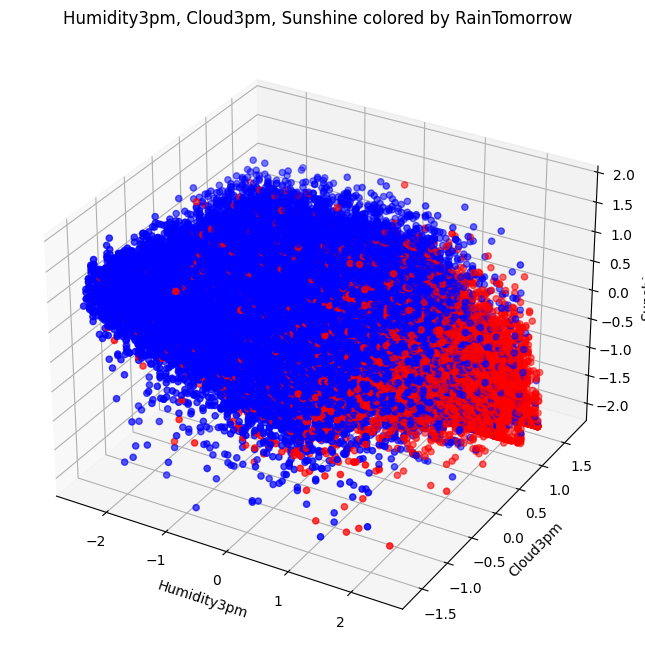

In [49]:
# 3d plot of humidity3pm, cloud3pm, sunshine colored by RainTomorrow where yes is red and no is blue

# copy humidity3pm, cloud3pm, sunshine and RainTomorrow 
df2 = df[['Humidity3pm', 'Cloud3pm', 'Sunshine', 'RainTomorrow']].copy()

# drop rows with missing values
df2 = df2.dropna().reset_index(drop=True)

# split into 2 dataframes features and target
X = df2[['Humidity3pm', 'Cloud3pm', 'Sunshine']]
y = df2['RainTomorrow']

# normalize features
X = (X - X.mean()) / X.std()

# create a color for each data point based on RainTomorrow
colors = []
for i in range(len(y)):
    if y[i] == 'Yes':
        colors.append('red')
    else:
        colors.append('blue')

# plot 3d
plt.figure(figsize=(16, 8))
ax = plt.axes(projection='3d')
ax.scatter3D(X['Humidity3pm'], X['Cloud3pm'], X['Sunshine'], c=colors)
ax.set_xlabel('Humidity3pm')
ax.set_ylabel('Cloud3pm')
ax.set_zlabel('Sunshine')
plt.title('Humidity3pm, Cloud3pm, Sunshine colored by RainTomorrow')
plt.show()

d:\programing\programs\anaconda\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


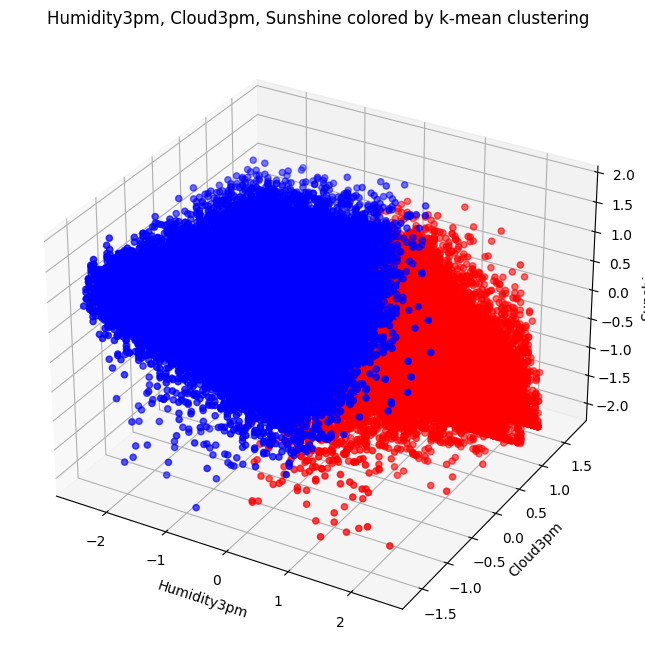

In [50]:
# 3d plot of humidity3pm, cloud3pm, sunshine colored by k-mean clustering

# use k-mean to cluster the data
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

# create a color for each cluster
colors = []
for i in range(len(y)):
    if kmeans.labels_[i] == 1:
        colors.append('red')
    else:
        colors.append('blue')

# plot 3d
plt.figure(figsize=(16, 8))
ax = plt.axes(projection='3d')
ax.scatter3D(X['Humidity3pm'], X['Cloud3pm'], X['Sunshine'], c=colors)
ax.set_xlabel('Humidity3pm')
ax.set_ylabel('Cloud3pm')
ax.set_zlabel('Sunshine')
plt.title('Humidity3pm, Cloud3pm, Sunshine colored by k-mean clustering')
plt.show()

In [51]:
"""
We can see k-mean clustering did somewhat a good job in clustering the data and clusters seem to be close the original
target labels.

Athough the clusters are not perfect, it emphasizes the fact that humidity3pm, cloud3pm, sunshine are important features 
that can used to predict RainTomorrow.

And this agrees the fact we suggested before that these features have high correlation with RainTomorrow.
"""

'\nWe can see k-mean clustering did somewhat a good job in clustering the data and clusters seem to be close the original\ntarget labels.\n\nAthough the clusters are not perfect, it emphasizes the fact that humidity3pm, cloud3pm, sunshine are important features \nthat can used to predict RainTomorrow.\n\nAnd this agrees the fact we suggested before that these features have high correlation with RainTomorrow.\n'

In [52]:
"""
Visualizations Summary:

In data visualization we used pandas, matplotlib and seaborn to visualize the data and get a better understanding of
the data.

We explored the data and got a better understanding of the data, its features and its target.

Then we visualized the target variable and its distribution, and we saw that the data is imbalanced and has missing values.

Then we visulalized the numerical and categorical features sperately as each type of features needs a different type of
visualizations.

For the numerical features we got a better understanding of the distribution of the data, the outliers and the missing values with
the help of boxplots, histograms and scatter plots.

For categorical features we got a better understanding of the data, missing values and distribution of the data.

Then we explored the relationships between the features and also between the features and the target,
using the correlation matrix we found out that indeed some of the features have high correlation with each other and with the target.

Then we visualized important features and their change over time, we took the year 2015 as an example to get a better understanding of
how important features such as temperature, humidity, wind speed, pressure, evaporation, sunshine and rainfall change over the year.

We used the top 3 correlated features with the target to visualize the data in 3d space and see how the taraget labels are
distributed in this 3d space.

Using k-mean clustering we clustered the data into 2 clusters using those 3 features and we saw that the clusters are close to the
original target labels.

"""

'\nVisualizations Summary:\n\nIn data visualization we used pandas, matplotlib and seaborn to visualize the data and get a better understanding of\nthe data.\n\nWe explored the data and got a better understanding of the data, its features and its target.\n\nThen we visualized the target variable and its distribution, and we saw that the data is imbalanced and has missing values.\n\nThen we visulalized the numerical and categorical features sperately as each type of features needs a different type of\nvisualizations.\n\nFor the numerical features we got a better understanding of the distribution of the data, the outliers and the missing values with\nthe help of boxplots, histograms and scatter plots.\n\nFor categorical features we got a better understanding of the data, missing values and distribution of the data.\n\nThen we explored the relationships between the features and also between the features and the target,\nusing the correlation matrix we found out that indeed some of the fea

In [53]:
"""
Extracting insights from data.

We extracted insights from the data using the visualizations we made.

Here are some the most important insights we extracted from the data:

- Target variable is categorical with two classes, 'Yes' and 'No', and 
the dataset is imbalanced as the number of 'No' (77.58%) is much higher than the number of 'Yes' (22.41%).

- The target variable has small number of missing values which we will probably
drop later and it has two unique values 'Yes' and 'No'.

- The nummerical variables have a lot of missing values, some of them like sunshine has 
almost half of its values missing.

- From the boxplots and histograms we can see that Some numerical variables have outliers, 
specially Rainfall, WindGustSpeed, WindSpeed3pm, Evaporation, WindSpeed9am which have alot of outliers,
we can use the IQR method to remove outliers.

- The categorical variables have missing values too, however, the missing values are way less 
than the numerical variables, where the variable with the max missing values has less than 1% missing values.

- We noticed that the "date" column has 3436 unique values and that is alot compared to
other columns one way deal with that is to divide date into day, month and year columns,
and 1-hot encoding can be a good way to deal with categorical variables.

- From the correlation matrix between the features we found that:
    there is a high positive correlation between 
        - min temperature, max temperature , temperature at 3pm, temperature at 9am.
        - wind gust speed, wind speed at 3pm, wind speed at 9am.
        - humidity at 3pm, humidity at 9am.
        - pressure at 3pm, pressure at 9am.
        - cloud 3pm, cloud 9am.

    there is a high negative correlation between
        - sunshine and cloud (intuitively makes sense).
        - sunshine and humidity at 3pm.

- From the correlation matrix between the features and the target we found that:
    The target variable has the highest positive correlation with humidity at 3pm = 0.41
    and a highest negative correlation with sunshine = -0.41

    Altough the correlation with the target variable is not that high, a machine learning model
    has the potential to be able to learn a pattern by combining the variables and predict the target variable.

- From the plots of the important features over time we found that:
    max and min temperature move together in the same direction,
    where the temperature in australia increases in December and January and decreases in June and July.

    humidity at 9am and 3pm also move together in the same direction, 
    where the humidity increases in June and July and decreases in December and January.

    wind gust speed, wind speed at 9am and 3pm move together in the same direction,
    where the wind seem to be the lowest in June and July.

    pressure at 9am and 3pm move together in the same direction, where the pressure increases in June and July 
    and decreases in December and January.

    evaporation and sunshine move together in the same direction, 
    where the evaporation and sunshine increases in December and January,
    and decreases in June and July.

    average rainfall does not seem to have a clear pattern, but we can say that 
    the highest rainfall rates are in June and July.

- Using k-mean analysis we found out that:
    using the top 3 correlated features with the target k-mean clustering did somewhat a good job in clustering the data and clusters seem to be close the original
    target labels.

    Athough the clusters are not perfect, it emphasizes the fact that humidity3pm, cloud3pm, sunshine are important features 
    that can used to predict RainTomorrow.

    And this agrees the fact we suggested before that these features have high correlation with RainTomorrow.
    
"""

'\nExtracting insights from data.\n\nWe extracted insights from the data using the visualizations we made.\n\nHere are some the most important insights we extracted from the data:\n\n- Target variable is categorical with two classes, \'Yes\' and \'No\', and \nthe dataset is imbalanced as the number of \'No\' (77.58%) is much higher than the number of \'Yes\' (22.41%).\n\n- The target variable has small number of missing values which we will probably\ndrop later and it has two unique values \'Yes\' and \'No\'.\n\n- The nummerical variables have a lot of missing values, some of them like sunshine has \nalmost half of its values missing.\n\n- From the boxplots and histograms we can see that Some numerical variables have outliers, \nspecially Rainfall, WindGustSpeed, WindSpeed3pm, Evaporation, WindSpeed9am which have alot of outliers,\nwe can use the IQR method to remove outliers.\n\n- The categorical variables have missing values too, however, the missing values are way less \nthan the nu